In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd

from joblib import load

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
logreg_import = load('logreg_poly.joblib')
neural_import = load('nn.joblib')
gradient_import = load('gbc.joblib')
decitree_import = load('dtc.joblib')
randofor_import = load('rfc.joblib')
stocha_import = load('sgdc.joblib')
linsvm_import = load('lsvc.joblib')
passaggr_import = load('pac.joblib')
ridgy_import = load('rdgc.joblib')
hisgra_import = load('hgbc_poly.joblib')

poly_std_train = np.load('/Users/mk2/Desktop/iMa/Model/std_pca_poly_train.npy')
poly_std_test = np.load('/Users/mk2/Desktop/iMa/Model/std_pca_poly_test.npy')

train_group1 = pd.read_csv('/Users/mk2/Desktop/iMa/Model/train_group1.csv',index_col=[0,1])
test_group1 = pd.read_csv('/Users/mk2/Desktop/iMa/Model/test_group1.csv',index_col=[0,1])

train_label1 = pd.read_csv('/Users/mk2/Desktop/iMa/Model/train_label1.csv',index_col=[0,1])
test_label1 = pd.read_csv('/Users/mk2/Desktop/iMa/Model/test_label1.csv',index_col=[0,1])

### calibrated logreg

In [15]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_logreg = CalibratedClassifierCV(base_estimator=logreg_import,
                                    method='sigmoid', cv=None, n_jobs=None, ensemble=True)
calibrated_logreg.fit(poly_std_train,train_label1)

prediction_logreg = calibrated_logreg.predict(poly_std_test)
print(classification_report(test_label1, prediction_logreg))

/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.83      0.92      0.87     11526
           1       0.61      0.39      0.48      3618

    accuracy                           0.79     15144
   macro avg       0.72      0.66      0.67     15144
weighted avg       0.78      0.79      0.78     15144



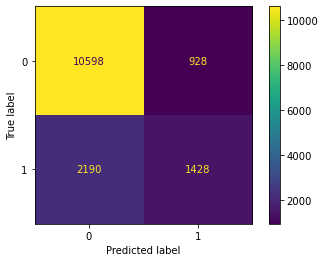

In [16]:
cm_logreg = confusion_matrix(test_label1, prediction_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg)
disp.plot()

### calibrated nn

In [8]:
calibrated_nn = CalibratedClassifierCV(neural_import, cv=5)
calibrated_nn.fit(poly_std_train,train_label1)

prediction_nn = calibrated_nn.predict(poly_std_test)
print(classification_report(test_label1, prediction_nn))

/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.78      0.97      0.87     11526
           1       0.58      0.14      0.22      3618

    accuracy                           0.77     15144
   macro avg       0.68      0.55      0.54     15144
weighted avg       0.73      0.77      0.71     15144



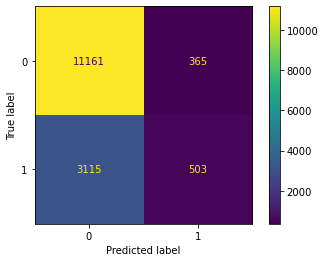

In [9]:
cm_nn = confusion_matrix(test_label1, prediction_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp.plot()